<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>

<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Diabetes Prediction Project</h1>
</div>

Just learning the concepts and theory is not sufficient to ace in machine learning. You need to implement the concepts and try to solve more practical problems.

In this notebook, you will learn how to implement machine learning. You will be able to kickstart your project using this template.

### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
  - Data Cleaning
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
7. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well.

In [31]:
# Input file name with path
input_file_name = 'adult.csv'

# Target class name
input_target_class = "Income"

# Columns to be removed
#input_drop_col = "CustomerId"

# Col datatype selection
input_datatype_selection = 'auto'  # use auto if you don't want to provide column names by data type else use 'manual'

# Categorical columns
#input_cat_columns = [] #input_cat_columns = ['Surname', 'Geography', 'Gender', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Numerical columns
#input_num_columns = [] #input_num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Encoding technique
input_encoding = 'OneHotEncoder' # choose the encoding technique from 'LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder' and 'FrequencyEncoder'

# Handle missing value
input_treat_missing_value = 'drop' # choose how to handle missing values from 'drop','inpute' and 'ignore'

# Machine learning algorithm
input_ml_algo = 'RandomForestClassifier' # choose the ML algorithm from 'LogisiticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier' and LGBMClassifier'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [32]:
# Import libraries

# Data Manipulation

import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, RocCurveDisplay


from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [33]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name)

# First 5 rows of the dataset
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode
- Min, max
- Count etc

Let's understand the data we have

In [34]:
# Dimension of the data
df.shape

(32561, 15)

In [35]:
# Summary of the dataset
df.describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [36]:
# Missing values for every column
df.isna().sum()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [37]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)

else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)

    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['Gender', 'Income']
Categorical Columns :  ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Native Country', 'Income']
Numerical Columns :  ['Age', 'Final Weight', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

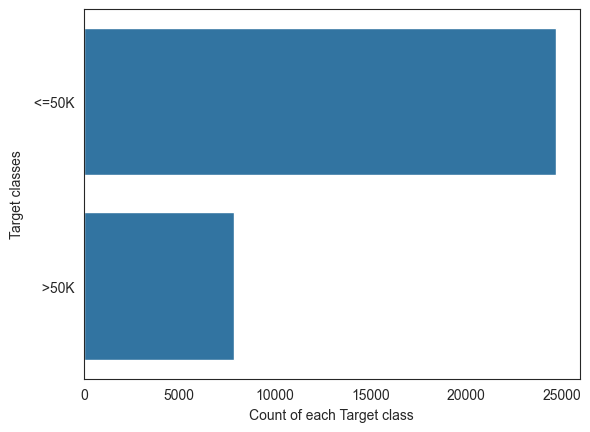

In [38]:
# Check distribution of target class
sns.countplot(y=df[input_target_class] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 3.3. Check the distribution of every feature

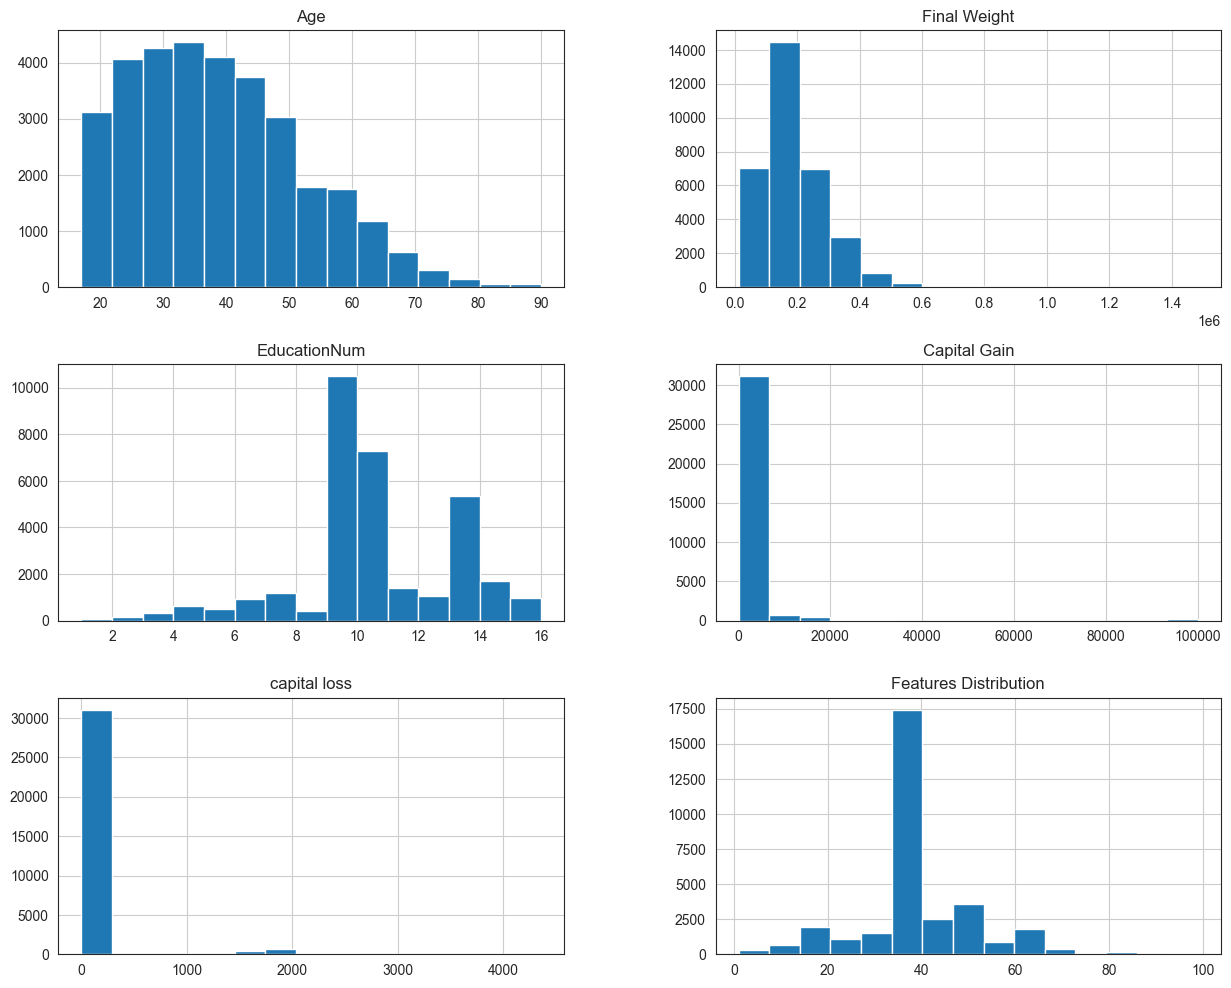

In [39]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.4 Check how differnt numerical features are realated to target class

In [40]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

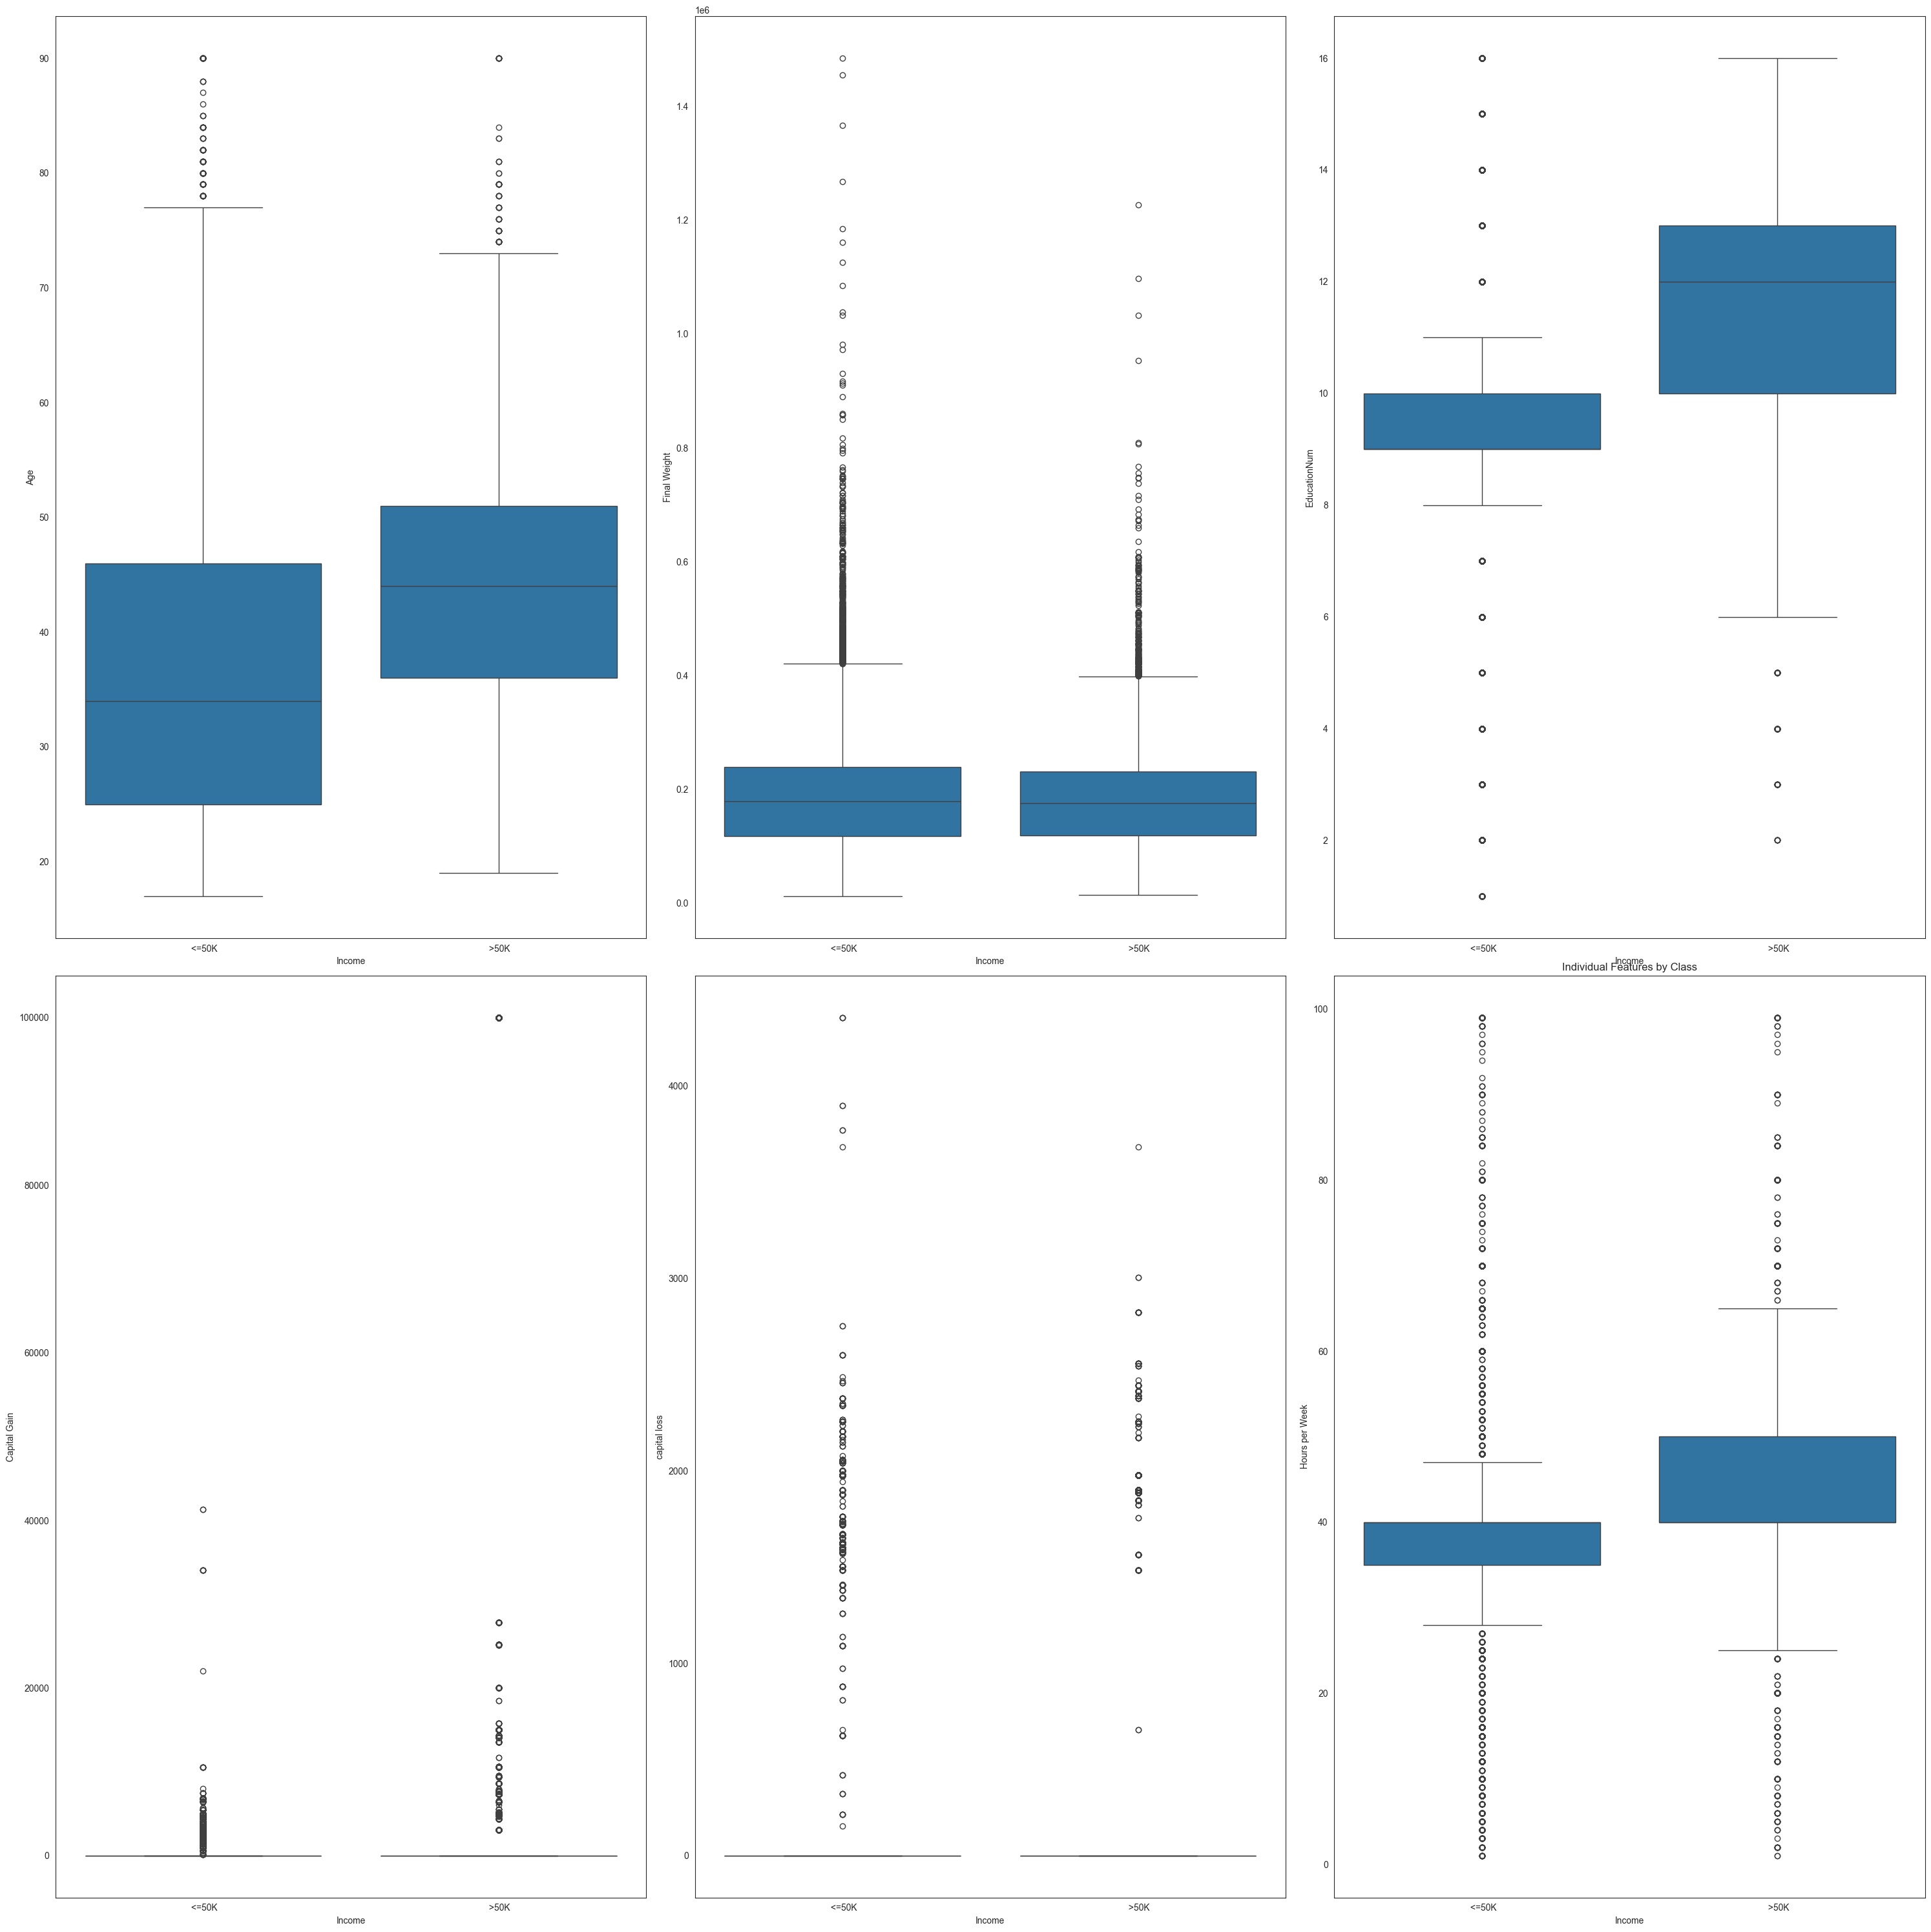

In [41]:
# Check the distribution of y variable corresponding to every x variable
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df[input_target_class], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

In [42]:
# Select how you wish to treat missing values according to the input provided
if input_treat_missing_value == 'drop':

    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute':

    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna("Unknown")
elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

(32561, 15)


In [43]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [44]:
categorical_columns.remove(input_target_class)
categorical_columns

['Workclass',
 'Occupation',
 'Gender',
 'Education',
 'Relationship',
 'Marital Status',
 'Native Country',
 'Race']

In [45]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)

elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency
        fq = df.groupby(variable).size()/len(df)
        # mapping values to dataframe
        df.loc[:, "{}".format(variable)] = df[variable].map(fq)

In [46]:
df.head()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ ?,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Gender_ Female,Gender_ Male,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Marital Status_ Divorced,Marital Status_ Married-AF-spouse,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Native Country_ ?,Native Country_ Cambodia,Native Country_ Canada,Native Country_ China,Native Country_ Columbia,Native Country_ Cuba,Native Country_ Dominican-Republic,Native Country_ Ecuador,Native Country_ El-Salvador,Native Country_ England,Native Country_ France,Native Country_ Germany,Native Country_ Greece,Native Country_ Guatemala,Native Country_ Haiti,Native Country_ Holand-Netherlands,Native Country_ Honduras,Native Country_ Hong,Native Country_ Hungary,Native Country_ India,Native Country_ Iran,Native Country_ Ireland,Native Country_ Italy,Native Country_ Jamaica,Native Country_ Japan,Native Country_ Laos,Native Country_ Mexico,Native Country_ Nicaragua,Native Country_ Outlying-US(Guam-USVI-etc),Native Country_ Peru,Native Country_ Philippines,Native Country_ Poland,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,39,77516,13,2174,0,40,<=50K,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,50,83311,13,0,0,13,<=50K,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,38,215646,9,0,0,40,<=50K,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Fa

### 4.3. Split X and y

Split the X and y dataset

In [47]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [48]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):

    scaler = StandardScaler()

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns

    return scaled_data

In [49]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Occupation_ ?,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Gender_ Female,Gender_ Male,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Marital Status_ Divorced,Marital Status_ Married-AF-spouse,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Native Country_ ?,Native Country_ Cambodia,Native Country_ Canada,Native Country_ China,Native Country_ Columbia,Native Country_ Cuba,Native Country_ Dominican-Republic,Native Country_ Ecuador,Native Country_ El-Salvador,Native Country_ England,Native Country_ France,Native Country_ Germany,Native Country_ Greece,Native Country_ Guatemala,Native Country_ Haiti,Native Country_ Holand-Netherlands,Native Country_ Honduras,Native Country_ Hong,Native Country_ Hungary,Native Country_ India,Native Country_ Iran,Native Country_ Ireland,Native Country_ Italy,Native Country_ Jamaica,Native Country_ Japan,Native Country_ Laos,Native Country_ Mexico,Native Country_ Nicaragua,Native Country_ Outlying-US(Guam-USVI-etc),Native Country_ Peru,Native Country_ Philippines,Native Country_ Poland,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,4.907700,-0.02074,-0.244944,2.763489,-0.016628,-0.379495,-0.377746,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.703071,0.703071,-0.171753,-0.193487,-0.116092,-0.072016,-0.10165,-0.142272,-0.126645,-0.184064,-0.210534,2.253993,-0.113344,-0.689942,-0.236374,-0.039607,-0.134196,-0.537144,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927,-0.397508,-0.026587,-0.922841,-0.114037,1.431058,-0.180285,-0.177358,-0.135023,-0.024163,-0.061073,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.052647,-0.029857,-0.065002,-0.029857,-0.044378,-0.036785,-0.005542,-0.019985,-0.024791,-0.019985,-0.055503,-0.036364,-0.027159,-0.047402,-0.049938,-0.043678,-0.023518,-0.141934,-0.032331,-0.02074,-0.03087,-0.078218,-0.042966,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,-0.098201,-0.181552,-0.325768,-0.091612,0.413020
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.24445,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,-0.02074,-0.244944,-0.361861,-0.016628,-0.379495,2.647285,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.703071,0.703071,-0.171753,-0.193487,-0.116092,-0.072016,-0.10165,-0.142272,-0.126645,-0.184064,-0.210534,2.253993,-0.113344,-0.689942,-0.236374,-0.039607,

### 4.5 Train - Test Split

Split the dataset in training and test set

In [50]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [51]:
# Select the algorithm according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif input_ml_algo == 'RandomForestClassifier':
    model = RandomForestClassifier()

In [52]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestClassifier()

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [53]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']
Y probability predicted :  [0.04, 0.01, 0.04, 0.4, 0.43]


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [54]:
# Define a function to compute various evaluation metrics
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    #RocCurveDisplay.from_predictions(y_actual, y_predicted_prob)
    plt.show()

In [55]:
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)


 Accuracy Score : 
  0.8519807554509161

 AUC Score : 
 0.9044603835514087

 Confusion Matrix : 
  [[6855  552]
 [ 894 1468]]

 Classification Report : 
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769


 ROC curve : 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model.

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results.

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [56]:
# Over sample the minority class
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()

Income
<=50K    24720
>50K     24720
Name: count, dtype: int64

In [57]:
# Define the function to build model on balanced dataset
def classification_model(X, y):

    scaled_X = scale_data(X)

    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]

    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

    return model

In [58]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)


 Accuracy Score : 
  0.9254314994606256

 AUC Score : 
 0.9816390066392794

 Confusion Matrix : 
  [[6567  905]
 [ 201 7159]]

 Classification Report : 
               precision    recall  f1-score   support

       <=50K       0.97      0.88      0.92      7472
        >50K       0.89      0.97      0.93      7360

    accuracy                           0.93     14832
   macro avg       0.93      0.93      0.93     14832
weighted avg       0.93      0.93      0.93     14832


 ROC curve : 



### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [59]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [60]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           }

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]
                           }

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 }

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

In [61]:
# Select the model and parameter grid according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model       = DecisionTreeClassifier()
    param_grid  = param_grid_decision_tree
elif input_ml_algo == 'RandomForestClassifier':
    model       = RandomForestClassifier()
    param_grid  = param_grid_random_forest

In [63]:
 # Run grid search
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, n_jobs = -1)

# fit the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [65]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [' <=50K' ' >50K' ' >50K' ... ' <=50K' ' >50K' ' <=50K']
Y probability predicted :  [0.3331936537290703, 0.6477535600930219, 0.9575826854733629, 0.4008522530891213, 0.9985293248805169]


In [66]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)


 Accuracy Score : 
  0.9215210355987055

 AUC Score : 
 0.9814879081178427

 Confusion Matrix : 
  [[6504  968]
 [ 196 7164]]

 Classification Report : 
               precision    recall  f1-score   support

       <=50K       0.97      0.87      0.92      7472
        >50K       0.88      0.97      0.92      7360

    accuracy                           0.92     14832
   macro avg       0.93      0.92      0.92     14832
weighted avg       0.93      0.92      0.92     14832


 ROC curve : 



### 6.3. Save the final model

You can save the model in local disk and use it whenever you want

In [67]:
# save the model to disk
filename = 'diabetes_model.pkl'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [68]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(max_depth=40, n_estimators=200)

<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>